# Bilinear interpolation

`bilinear(x0,y0,f0)}` implements bilinear interpolation and returns the 2D `interpolant` (a Python function). Our function assumes that the knots are evenly spaced and evaluation points are within the closed interval $[0,1]^2$. The function parameters `x0` and `y0` represent the coordinates of the knots, `f0` the data values there, and the `interpolant` function itself has as its parameters the coordinates of the evaluation points, say, `xx` and `yy`, and returns the interpolated values on these points.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def bilinear(x0,y0,f0):
    '''
    Parameters:
    - x0: array of x coordinates of the knots.
    - y0: array of y coordinates of the knots.
    - f0: 2D array of values of f at (x,y).
    
    Returns:
    - interpolant: the Python function with parameters xx and yy and returns the interpolated values at xx and yy.
    '''
    
    
    def interpolant(xx,yy):
        '''
        Parameters:
        - xx: array of x coordinates of the evaluation points.
        - yy: array of y coordinates of the evaluation points.

        Returns:
        - f: 2D array of interpolated values at xx and yy.
        '''
        
        # This version relies on the data being evenly spaced

        N = np.size(xx)   # new evaluation points
        M = np.size(x0)  # original knot points
        
        f = np.empty((N,N))

        # calculates spacing assuming interval [-1,1]
        h = (2)/(M-1)
        # making sure we don't overshoot the last subinterval
        k_x = np.minimum(M-2,((xx-x0[0])/h).astype(int))
        k_y = np.minimum(M-2,((yy-y0[0])/h).astype(int))
                
        ip = np.arange(N)
                            
        for i in range(N):
            f[i,ip] = (1 / ((x0[k_x[i]]-x0[k_x[i]+1])*(y0[k_y[ip]]-y0[k_y[ip] + 1]))) * (
            (yy[ip]-y0[k_y[ip]+1]) * (xx[i]-x0[k_x[i]+1]) * f0[k_x[i],k_y[ip]] -
            (yy[ip]-y0[k_y[ip]+1]) * (xx[i]-x0[k_x[i]]) * f0[k_x[i]+1,k_y[ip]] -
            (yy[ip]-y0[k_y[ip]]) * (xx[i]-x0[k_x[i]+1]) * f0[k_x[i],k_y[ip]+1] +
            (yy[ip]-y0[k_y[ip]]) * (xx[i]-x0[k_x[i]]) * f0[k_x[i]+1,k_y[ip]+1]
            )
        
        return f
        
    return interpolant

We use `bilinear(x0,y0,f0)` to perform bilinear interpolation on a $10\times 10$ grid, evaluating the interpolant(s) on a $100\times100$ grid on the same domain. We store the interpolated values in a numpy array named `ff1` and we plot of the difference between the exact $f(x,y)$ and these interpolated values on these points.

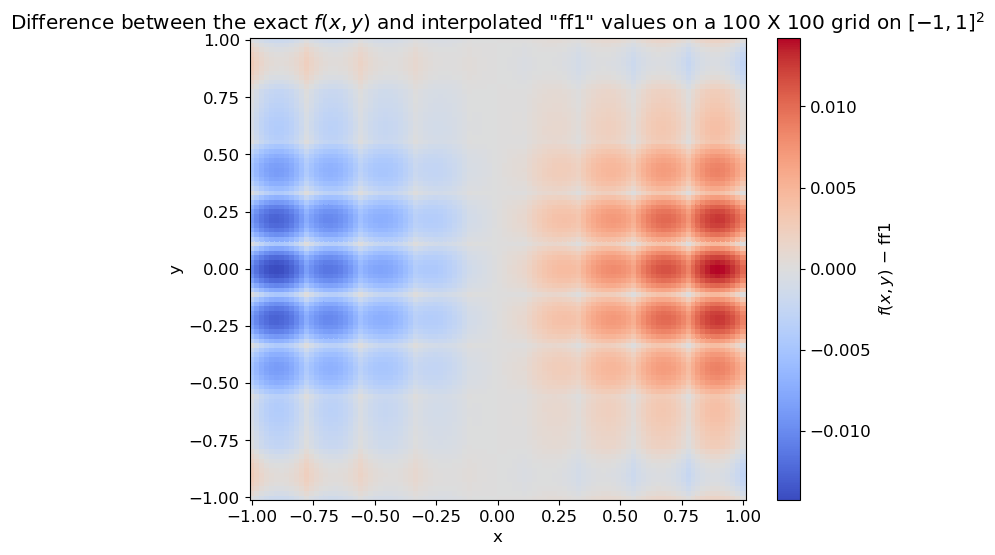

In [2]:
def f(x,y):
    '''
    Returns the Python function sin(x) * e^(-y^2).
    '''
    return(np.sin(x) * np.exp(- y ** 2))

# generates knots on a 10x10 grid
x10 = np.linspace(-1,1,10)
y10 = np.linspace(-1,1,10)
X10,Y10 = np.meshgrid(x10,y10,indexing = "ij")
f10 = f(X10,Y10)

# generates the evaluation points on a 100x100 grid
xx = np.linspace(-1,1,100)
yy = np.linspace(-1,1,100)
(XX,YY) = np.meshgrid(xx,yy,indexing = "ij")

# calculates the interpolated values on a 100x100 grid
twodint = bilinear(x10,y10,f10)
ff1 = twodint(xx,yy)

# calculates exact values on a 100x100 grid
fexact = f(XX,YY)

# plots the error between exact and interpolated values on a 100x100 grid
plt.rcParams.update({'font.size': 12})
plt.figure(figsize = (8,6))
plt.pcolor(XX, YY, (fexact-ff1), cmap = "coolwarm")
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar(label = "$f(x,y)$ $-$ ff1")
plt.title("Difference between the exact $f(x,y)$ and interpolated \"ff1\" values on a 100 X 100 grid on $[-1,1]^2$")
plt.show()

In [3]:
# calculates the maximum error between the interpolant and exact function
Error_part1 = np.max(np.abs(fexact-ff1))
print(Error_part1)

0.014226140698689549


# Bivariate polynomial interpolation

`Lagrange_basis(xp,x)` has parameters `xp` representing an array of size $n$ of coordinates of the knots and `x` representing an array of coordinates of size $m$ of the evaluation points. The function returns a $m \times n$ array of Lagrange basis where the $i,j$-th entry corresponds to $l_i(x_j)$.

In [4]:
def Lagrange_basis(xp,x):
    '''
    Parameters:
    - xp: array of coordinates of the knots.
    - x:  array of coordinates of the evaluation points.

    Returns:
    - l: m x n array of Lagrange basis where the i,j th entry is l_i(x_j).
    '''
    
    n = np.size(xp)    # number of knots
    m = np.size(x)     # number of evaluation points
    
    l = np.zeros((n,m))
    
    for j in range(n):  # loop over knots (a small number compared to m)
        
        # By using array broadcasting we can do all factors in the product together with evaluation points
        # the product should not include xp[j] so one simple approach is to segment in two parts; <j and >j

        p1 = np.prod((x[:,np.newaxis]-xp[:j])/(xp[j]-xp[:j]),axis=1)
        p2 = np.prod((x[:,np.newaxis]-xp[j+1:])/(xp[j]-xp[j+1:]),axis=1)
            
        l[j,:] = p1*p2
    return l

We use `Lagrange_basis(xp,x)` to perform Lagrange Polynomial fit on a $5\times 5$ grid of knots, evaluating the interpolant on a $100\times100$ grid on the same domain. We store the interpolated values in a numpy array named `ff2` and we plot of the difference between the exact $f(x,y)$ and these interpolated values on these points.

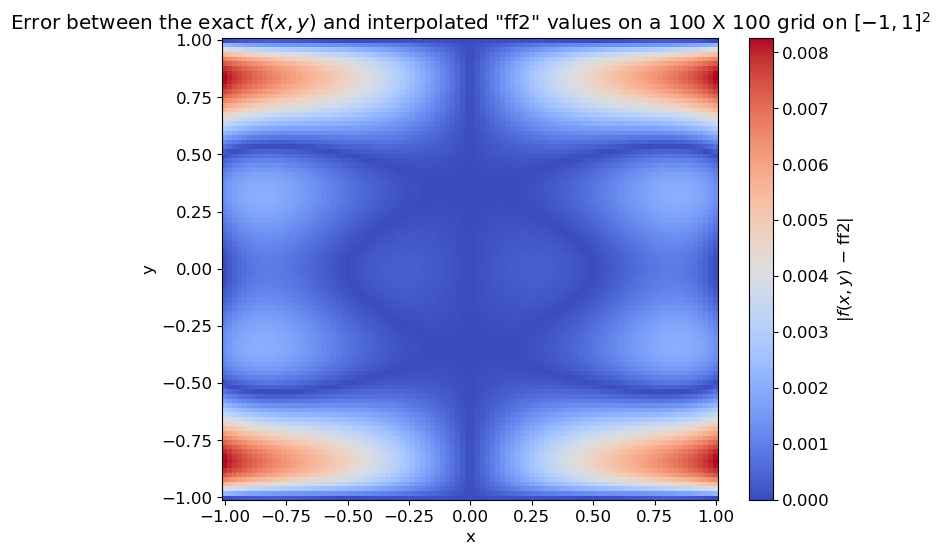

In [5]:
# generates the knots on a 5x5 grid
x5 = np.linspace(-1,1,5)
y5 = np.linspace(-1,1,5)
X5,Y5 = np.meshgrid(x5,y5,indexing = "ij")
f5 = f(X5,Y5)

# calculates the lagrange basis on a 5x5 grid
Lagrange_x = Lagrange_basis(x5,xx)
Lagrange_y = Lagrange_basis(y5,yy)

# calculates the interpolated values on a 100x100 grid
ff2 = np.zeros((100,100))
for i in range(5):
    for j in range(5):
        ff2 += (Lagrange_x[i][:,np.newaxis] @ Lagrange_y[j][np.newaxis,:]) * f5[i,j]
        
# plots the error between exact and interpolated values on a 100x100 grid
plt.rcParams.update({'font.size': 12})
plt.figure(figsize = (8,6))
plt.pcolor(XX, YY, np.abs(fexact-ff2), cmap = "coolwarm")
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar(label = "|$f(x,y)$ $-$ ff2|")
plt.title("Error between the exact $f(x,y)$ and interpolated \"ff2\" values on a 100 X 100 grid on $[-1,1]^2$")
plt.show()

In [6]:
# calculates the maximum error between the interpolant and exact function
Error_part2 = np.max(np.abs(fexact-ff2))
print(Error_part2)

0.008263713937677108


The maximum error in part 2 is `Error_part2` $=0.008264$ (4 s.f.) and the maximum error in part 1 is `Error_part1` $=0.01423$ (4 s.f.).

# Error analysis 

`maximum_error(n, fexact, method)` takes the number of knots `n` in each direction, the exact function `fexact`, and the interpolation `method` to be used. The function returns the maximum error between the interpolant and the exact function.

In [7]:
from scipy.interpolate import RegularGridInterpolator

def maximum_error(n, method = 'linear'):
    '''
    Parameters:
    - n: number of knots in each direction.

    Returns:
    - Error_partn: the maximum error between the interpolant and the exact function.
    '''
    # generates knots on a n x n grid
    xn = np.linspace(-1,1,n)
    yn = np.linspace(-1,1,n)
    XN,YN = np.meshgrid(xn,yn,indexing = "ij")
    fn = f(XN,YN)
    
    # calculates the interpolated values on a 100x100 grid
    g = RegularGridInterpolator((xn,yn), fn, method=method)
    ffn = g((XX,YY))

    # calculates exact values on a 100x100 grid
    #fexact = f(XX,YY)
    Error_partn = np.max(np.abs(fexact - ffn))
    
    return Error_partn

Using `maximum_error`, we evaluate the maximum errors for various number of knots using the bilinear and bicubic methods. We make a $\log$-$\log$ plot of the max error of bilinear and bicubic interpolation against the number of knots $n$ and step size $h$.


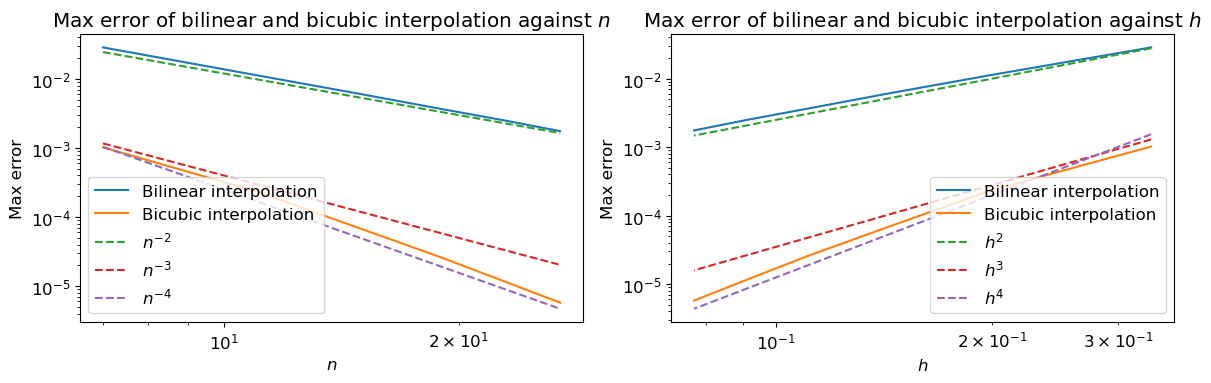

In [8]:
n = np.array([7,11,15,19,23,27])
h = 2 / (n-1)
bilinear_error = np.empty(len(n))
bicubic_error = np.empty(len(n))

t = 0
for i in n:
    bilinear_error[t] = maximum_error(i, method = 'linear')
    bicubic_error[t] = maximum_error(i, method = 'cubic')
    #print(f'n = {i}, bilinear error = {bilinear_error[t]}, bicubic error = {bicubic_error[t]}')
    t += 1
    
fig, (ax,bx) = plt.subplots(1,2,figsize = (12,4))
#plt.rcParams.update({'font.size': 12})

ax.loglog(n,bilinear_error,label='Bilinear interpolation')
ax.loglog(n,bicubic_error,label='Bicubic interpolation')
ax.loglog(n,1.2*(1/n)**(2),'--',label='$n^{-2}$')
ax.loglog(n,0.4*(1/n)**(3),'--',label='$n^{-3}$')
ax.loglog(n,2.5*(1/n)**(4),'--',label='$n^{-4}$')
ax.set_ylabel('Max error')
ax.set_xlabel('$n$')
ax.set_title('Max error of bilinear and bicubic interpolation against $n$')
ax.legend()

bx.loglog((h),(bilinear_error),label='Bilinear interpolation')
bx.loglog((h),(bicubic_error),label='Bicubic interpolation')
bx.loglog(h,0.25*h**2,'--',label='$h^2$')
bx.loglog(h,0.035*h**3,'--',label='$h^3$')
bx.loglog(h,0.125*h**4,'--',label='$h^4$')
bx.set_ylabel('Max error')
bx.set_xlabel('$h$')
bx.set_title('Max error of bilinear and bicubic interpolation against $h$')
bx.legend()

plt.tight_layout()

# Extra 1: Vandermode matrix

`vandermonde_matrix(x, y, degree)` takes an array of `x` coordinates and `y`coordinates of the knots and the `degree` of the polynomial; and returns the Vandermode matrix for the $n$-th degree polynomial.

In [9]:
def vandermonde_matrix(x, y, degree):
    '''
    Parameters:
    - x: array of x coordinates of the knots.
    - y: array of y coordinates of the knots.
    - degree: integer for the degree of the polynomial.
    
    Returns:
    - V: the vandermode matrix
    '''
    n = len(x)
    V = np.zeros((n, (degree + 1) ** 2))
    col = 0
    
    # ranges over all combinations of x^i * y^j in each row and column
    for i in range(degree + 1):
        for j in range(degree + 1):
            V[:, col] = (x ** i) * (y ** j)
            col += 1
    return V

We use `vandermonde_matrix(x, y, degree)` to perform a bivariate polynomial interpolation on a $5\times 5$ grid of knots, evaluating the interpolant on a $100\times100$ grid on the same domain. We store the interpolated values in a numpy array named `ffa` and we plot of the difference between the exact $f(x,y)$ and these interpolated values on these points.

/var/folders/bm/ndtdvj1x2_sc714t0rftqt2r0000gn/T/ipykernel_27216/3932348260.py:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ffa[i, j] = np.dot(V, coeff)


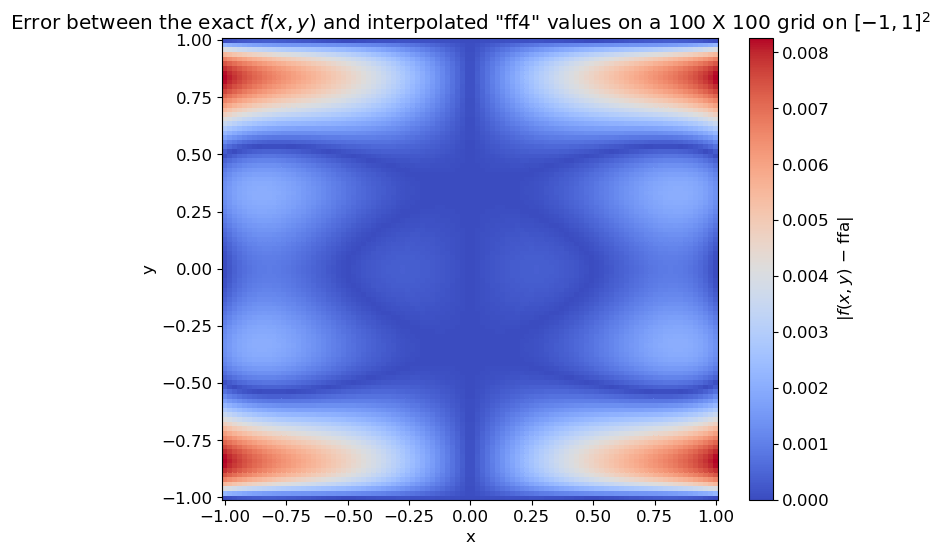

In [10]:
# calculates the coefficients using the Vandermode matrix on a 5x5 grid
degree = 4
f5 = f(X5.flatten(),Y5.flatten())
V = vandermonde_matrix(X5.flatten(),Y5.flatten(),degree)
coeff = np.linalg.lstsq(V, f5, rcond=None)[0]

# calculates the interpolated values on a 100x100 grid
ffa = np.empty((100,100))
for i in range(100):
    for j in range(100):
        V = vandermonde_matrix(np.array([xx[i]]),np.array([yy[j]]),degree)
        ffa[i, j] = np.dot(V, coeff)

# plots the error between exact and interpolated values on a 100x100 grid
plt.rcParams.update({'font.size': 12})
plt.figure(figsize = (8,6))
plt.pcolor(XX, YY, np.abs(fexact-ffa), cmap = "coolwarm")
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar(label = "|$f(x,y)$ $-$ ffa|")
plt.title("Error between the exact $f(x,y)$ and interpolated \"ff4\" values on a 100 X 100 grid on $[-1,1]^2$")
plt.show()

In [11]:
# calculates the maximum error between the interpolant and exact function
Error_parta = np.max(np.abs(fexact-ffa))
print(Error_parta)

0.008263713937678385
